In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl
print("openpyxl installed")

openpyxl installed


## About the data: 
#### The data used for our project is from the Immigration, Refugees and Citizenship of Canada (IRCC).
Facts and Figures 2017: Immigration Overview - Permanent Residents - 15. Canada - Permanent residents by source country, 2008 - 2017
Link: https://open.canada.ca/data/en/dataset/082f05ba-e333-4132-ba42-72828d95200b/resource/c2cc1d39-9a60-488f-a245-83f4edf0c229

In [3]:
df_can = pd.read_csv("https://www.ircc.canada.ca/opendata-donneesouvertes/data/IRCC_FF_PR_2017_15_CSV.csv", 
                     encoding='latin-1', skiprows=5)
df_can.head()

,Year/année,Source Country,Pays d'origine,Number/Nombre
0,2008,India,Inde,28255
1,2008,Philippines,Philippines,24883
2,2008,"China, People's Republic of","Chine, République populaire de",30030
3,2008,Syria,Syrie,919
4,2008,United States of America,États-Unis d'Amérique,10186


In [4]:
# The column source country is duplicated with a French column since Canada is Bilingual, 
# let's drop that and do a bit of cleaning
df_can.drop("Pays d'origine", axis=1, inplace=True)
df_can.rename(columns={"Year/année":"year", "Source Country":"source country", "Number/Nombre":"number"}, inplace=True)
df_can.head()

,year,source country,number
0,2008,India,28255
1,2008,Philippines,24883
2,2008,"China, People's Republic of",30030
3,2008,Syria,919
4,2008,United States of America,10186


In [5]:
df_can.shape

(2120, 3)

In [6]:
# Our table is too long to work with, let's make it wider (years) with the countries as index
df_2017 = df_can.pivot(index='source country', columns='year', values='number')

In [7]:
# Let's add a column for the total over the period and sort descending by the total
df_2017['total'] = df_2017.sum(axis=1)
df_2017.sort_values(by=['total'], ascending=False, inplace=True)
# df_2017 = df_2017.index.droplevel()
# df_2017.columns.tolist()
# df_2017.index.tolist()
df_2017.head(50)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,total
source country,,,,,,,,,,,
Philippines,24883,28568,38615,36758,34299,29530,40033,50838,41812,40851,366187
India,28255,29448,34225,27486,30914,33078,38335,39526,39792,51653,352712
"China, People's Republic of",30030,29617,30379,28491,33009,34114,24628,19534,26854,30281,286937
Pakistan,8984,7213,6810,7467,11208,12611,9113,11329,11337,7656,93728
Iran,6474,6580,7477,7479,7525,11288,16772,11668,6483,4737,86483
United States of America,10186,8994,8139,7671,7870,8485,8491,7521,8411,9100,84868
United Kingdom and Overseas Territories,8975,8872,8715,6128,6171,5814,5759,5450,5812,5293,66989
Syria,919,917,1040,1005,649,1008,2051,9854,34927,12044,64414
France,4532,5051,4646,4080,6270,5623,4718,5807,6348,6600,53675


In [8]:
df_2017.drop('total', axis=1, inplace=True)
# df_2017.index.dtypes
# df_2017_clean.head()
df_2017.head(50)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source country,,,,,,,,,,
Philippines,24883,28568,38615,36758,34299,29530,40033,50838,41812,40851
India,28255,29448,34225,27486,30914,33078,38335,39526,39792,51653
"China, People's Republic of",30030,29617,30379,28491,33009,34114,24628,19534,26854,30281
Pakistan,8984,7213,6810,7467,11208,12611,9113,11329,11337,7656
Iran,6474,6580,7477,7479,7525,11288,16772,11668,6483,4737
United States of America,10186,8994,8139,7671,7870,8485,8491,7521,8411,9100
United Kingdom and Overseas Territories,8975,8872,8715,6128,6171,5814,5759,5450,5812,5293
Syria,919,917,1040,1005,649,1008,2051,9854,34927,12044
France,4532,5051,4646,4080,6270,5623,4718,5807,6348,6600


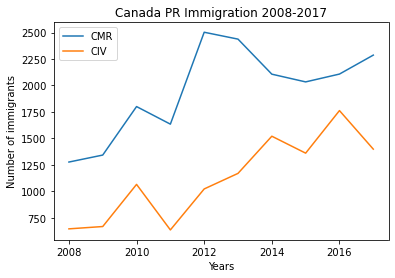

In [17]:
# Plotting line charts of Immigrants from Cameroon and Ivory
# df_2017.loc['Cameroon, Federal Republic of',].plot(kind='line' , label="Cmr")
# df_2017.loc['Egypt',].plot(kind='line', label="EGY")
# df_2017.loc['Algeria',].plot(kind='line', label="ALG")
# df_2017.loc['Nigeria',].plot(kind='line', label="NIG")
df_2017.loc['Cameroon, Federal Republic of',].plot(kind='line', label="CMR")
df_2017.loc['Ivory Coast, Republic of',].plot(kind='line', label="CIV")
plt.title('Canada PR Immigration 2008-2017')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Now let's compare the number of immigrants from India and China.
df_CI = df_2017.loc[['India','Chad, Republic of']]
df_CI